# Unsupervised learning
The most striking difference between supervised and unsupervised learning lies in the results. Unsupervised learning creates a new variable, the label, while supervised learning predicts an outcome. The machine helps the practitioner in the quest to label the data based on close relatedness. It is up to the analyst to make use of the groups and give a name to them.

## Clustering 

Clustering is an unsupervised machine learning technique that aims to divide dataset on segments where instances (cases) within segments are similar and instances between segments are dissimilar.

Tipical applications of cluster models are:
- market segmentation
- gene expression grouping
- topic segmentation (documents)
- etc.

## Problem (Motivation)

Retail store is trying to create several different customer campaigns based on customers Age and Salary. 
Age/Salary specific groups (clusters) of customers can help in creating more personal product catalogues.
Sending such catalogues via email should:
- increase sales and 
- reduce customer churn

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

In [19]:
age = [18, 21, 22, 24, 26, 26, 27, 30, 31, 35, 39, 40, 41, 42, 44, 46, 47, 48, 49, 54]
salary = [10000, 11000, 22000, 15000, 12000, 13000, 14000, 33000, 39000, 37000, 44000, 27000, 29000, 20000, 28000, 21000, 30000, 31000, 23000, 24000]

In [20]:
# Yet another way to create pd.Dataframe (based on dictionary with list values, and aatribute names as keys)
df = pd.DataFrame({'Age':age, 'Salary':salary})

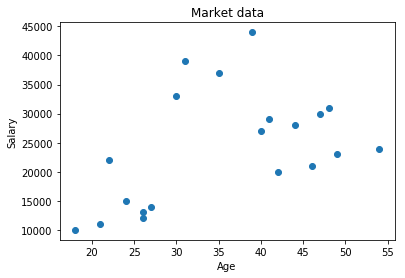

In [21]:
# Scatterplot pyplot

plt.scatter(age, salary)
plt.title('Market data')
plt.ylabel("Salary")
plt.xlabel("Age")
plt.grid = True
plt.show()


It can be seen from figure above that segmentation exists within customer data.

The question is how to automatically identify 'good' segments

## K-means algorithm 


K-means algorithm is the most popular clustering algorithm for decades bacause it is:
- Intuitive
- Fast
- Memory efficient
- etc.

K-means is representative (centroid). This means that each cluster can be represented with one point in space that is characteristic for that cluster.

sklearn.cluster contains efficient K-means implementation as well as many different clustering algorithms.


Learning ML models in sklearn is implemented with fit-predict pattern. This means that all models are learned by:
- Instantiation of model class (with parameters)
- Applying fit method (of instantiated class) to data.

In [22]:
from sklearn.cluster import KMeans

# Instantiation of k-means algorithm

kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)
print(kmeans_algorithm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [23]:
'''
Feat method executes K-means on the given data and returns cluster centers.
Note that cluster centers in K-means represent the whole clustering model. 
If we know cluster centers, we can assign all instances to adequate clusters
'''

cluster_model = kmeans_algorithm.fit(df)
centers = cluster_model.cluster_centers_
print(centers)

# sklearn returns centers as ndarray (in this case 3 cluster centers with 2 dimensions: Age and Salary)

[[  4.33000000e+01   2.55000000e+04]
 [  3.37500000e+01   3.82500000e+04]
 [  2.36666667e+01   1.25000000e+04]]


In [24]:
# Clusters are assigned to instance by .predict method

clusters = cluster_model.predict(df) # predict returns cluster labels

df['Cluster'] = clusters # adding cluster labels to dataframe

df.head(10)

,Age,Salary,Cluster
0,18,10000,2
1,21,11000,2
2,22,22000,0
3,24,15000,2
4,26,12000,2
5,26,13000,2
6,27,14000,2
7,30,33000,1
8,31,39000,1
9,35,37000,1


In [25]:
# Now lets check visually if clusters match our intuition

# First we will assign color to each cluster laberl
cluster_color_map = {0:'g', 1:'b', 2:'r'}

# Than we will create a list with cluster colors for each instance (Note that this could be done with Map function)
cluster_color = [cluster_color_map[i] for i in df.Cluster]

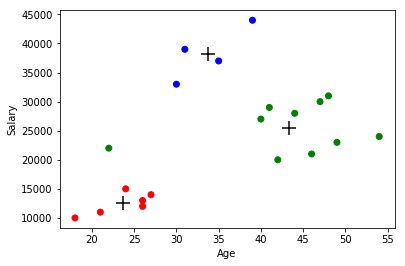

In [26]:
plt.close()
plt.xlabel('Age')
plt.ylabel('Salary')

# We create one scatter with cluster labels(colored)
plt.scatter(df.Age, df.Salary, c = cluster_color, label = df.Cluster)

# Create anoter scatter with cluster centers (Note that two ndarrays are provided because clusters are 2D)
plt.scatter(centers[:,0], centers[:,1], marker='+', s = 200, c = 'black')

plt.show()

### Question:

Why is upper left dot assigned wrongly?

## Normalization

Normalization is neccessary step before clustering (or any other method that is based on similarity/distance notion). This is because different measure scales will implicitely give different weights to clusters.

In previous example what we basically made clusters based on Salary (because it is measured on scale that is several orders of magnitude lager than Age)

sklearn.preprocessing gives different oprions for normalization in this case we will use MinMaxScaler.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
df_normalized = df[['Age', 'Salary']] # select only input attributes

In [30]:
# Fit predict pattern works for preprocessing methods too. 
# Instantioation and fitting is the same as for K-means
scaler = MinMaxScaler()
scaler.fit(df_normalized)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
# Instad of predict, preprocessing models have .transform method
df_normalized = scaler.transform(df_normalized)

In [34]:
# Since sklearn return ndarray, .head method cannot be used. We use np slicer in order to see first 5 elements
df_normalized[0:5,:]

array([[ 0.        ,  0.        ],
       [ 0.08333333,  0.02941176],
       [ 0.11111111,  0.35294118],
       [ 0.16666667,  0.14705882],
       [ 0.22222222,  0.05882353]])

In [35]:
# We use the same algorithm as before.
cluster_model_normalized = kmeans_algorithm.fit(df_normalized)

clusters_normalized = cluster_model_normalized.predict(df_normalized)

df_normalized = pd.DataFrame(df_normalized) # here columns can be added too Add this to Pandas lecture
df_normalized.columns = ['Age', 'Salary']

In [36]:
df_normalized['Cluster'] = clusters_normalized

In [37]:
centers_normalized = cluster_model_normalized.cluster_centers_
centers_normalized

array([[ 0.76851852,  0.46732026],
       [ 0.15079365,  0.11344538],
       [ 0.4375    ,  0.83088235]])

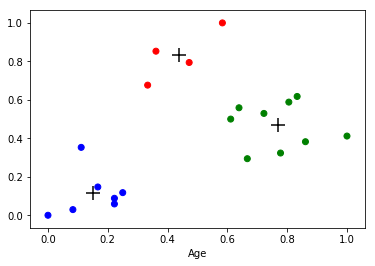

In [39]:
cluster_normalized_color = [cluster_color_map[i] for i in df_normalized.Cluster]
plt.close()
plt.xlabel('Age')
plt.scatter(df_normalized.Age, df_normalized.Salary, c = cluster_normalized_color, label = df_normalized.Cluster)
plt.scatter(centers_normalized[:,0], centers_normalized[:,1], marker='+', s = 200, c = 'black')
plt.show()

#It can be seen that instances are assigned to correct clusters after normalization

# Outliers 

Outliers are instances that have extreme values (compared to other instances in dataset) by one or more attributes. Most of the cluster algorithms (especially K-means) are highly sensitive to the presence of outliers because extreme values may influence final model by introducing bias towards extreme values.

This is why identification and removal of outliers should be done before building cluster models.

In [53]:
# First we will add new instance (outlier) that have extremely high Salary (especially for the age of 20) 
#compared to other instances.
df_outlier = df.append({'Age':20, 'Salary':80000}, ignore_index = True)

In [54]:
df_outlier = df_outlier[['Age', 'Salary']]

# fit_transform method may be used to normalize data in one step.
# note that previously defined scaler is used
df_outlier_normalized = scaler.fit_transform(df_outlier)

# Convert ndarray to pd.DataFrame
df_outlier_normalized = pd.DataFrame(df_outlier_normalized, columns = ['Age', 'Salary'])

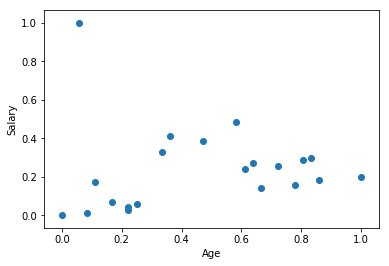

In [55]:
plt.close()
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df_outlier_normalized.Age, df_outlier_normalized.Salary)
plt.show()

# Note how outlier influenced on the distribution of the whole dataset. Clusters cannot be separated clearly as before

In [56]:
k_means_outlier = kmeans_algorithm.fit(df_outlier_normalized)
clusters_outliers = k_means_outlier.predict(df_outlier_normalized)

In [57]:
centers_outliers = k_means_outlier.cluster_centers_

In [58]:
df_outlier_normalized['Cluster'] = clusters_outliers

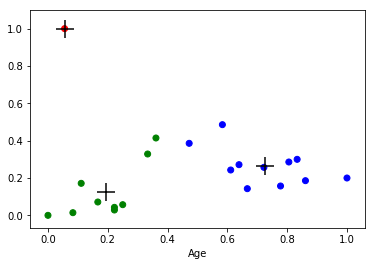

In [59]:
cluster_outlier_color = [cluster_color_map[i] for i in df_outlier_normalized.Cluster]

plt.close()
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df_outlier_normalized.Age, df_outlier_normalized.Salary, c = cluster_outlier_color, label = df_outlier_normalized.Cluster)
plt.scatter(centers_outliers[:,0], centers_outliers[:,1], marker='+', s = 300, c = 'black')
plt.show()

### Box plot outlier detection and removal

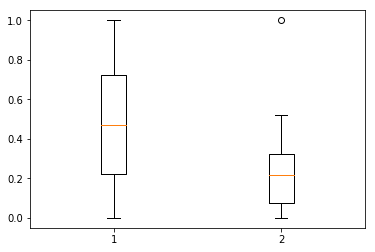

In [147]:
plt.boxplot(df_outlier_normalized[['Age', 'Salary']].T)
plt.show()

In [66]:
df_non_outlier = df_outlier_normalized.loc[df_outlier_normalized['Salary']<1]

## Z-score outlier removal  

Box plot outlier detection method is not convenient for multivariate identification of outliers. 
For multivariate outlier detection Z-score is one of standard methods for outlier detection.
Z-value shows how many standard deviations is instance away from the mean.
Usually 3 or more stanard deviations is considered as outlier. 

In [68]:
from pydataset import data

In [71]:
boston = data('Boston')
boston.shape

(506, 14)

In [70]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [72]:
from scipy import stats
import numpy as np

In [73]:
z = np.abs(stats.zscore(boston))

In [74]:
z

array([[ 0.41978194,  0.28482986,  1.2879095 , ...,  0.44105193,
         1.0755623 ,  0.15968566],
       [ 0.41733926,  0.48772236,  0.59338101, ...,  0.44105193,
         0.49243937,  0.10152429],
       [ 0.41734159,  0.48772236,  0.59338101, ...,  0.39642699,
         1.2087274 ,  1.32424667],
       ..., 
       [ 0.41344658,  0.48772236,  0.11573841, ...,  0.44105193,
         0.98304761,  0.14880191],
       [ 0.40776407,  0.48772236,  0.11573841, ...,  0.4032249 ,
         0.86530163,  0.0579893 ],
       [ 0.41500016,  0.48772236,  0.11573841, ...,  0.44105193,
         0.66905833,  1.15724782]])

In [75]:
np.where(z>3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [76]:
print(z[55,1])

3.37503876352


In [77]:
z.min()

0.00069276127057757029

## More methods and descriptions of Outliers
- [Basic methods](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [Advanced methods](https://scikit-learn.org/stable/modules/outlier_detection.html)

## Evaluation of clusters (Model selection)

Performance evaluation measure are used for assesing quality of models (not only cluster models), but also for
comparison between different models and selection of the best one.

Basic intuition for cluster evaluation follows definition of clusters:
-Instances should be close to each other (homogenous) within cluster
-Instances from one clusters should be distant from distances in other clusters.

Based on this intuition many evaluation measures are defined. In this example we will describe:
- Intra cluster distance (also known as Sum of Squared Errors, Homogeneity etc.) and
- Silhouette index


Sklearn functions for cluster performance evaluation and usage examples can be found [here.](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)




# Mini Task:
- read Boston data from pydataset.data
- Normalize the data
- Remove outliers
- Create 3 clusters with K-means
- Which attributes make the most difference between clusters?

In [5]:
from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
boston = data('Boston')
att_names = list(boston.columns)
boston = MinMaxScaler().fit_transform(boston)

In [6]:
model = KMeans(n_clusters=3, max_iter=100).fit(boston)
centroids = model.cluster_centers_
cluster_labels = model.predict(boston)

centroids

array([[  1.10954841e-03,   3.00111111e-01,   1.69426116e-01,
          3.33333333e-02,   1.26231139e-01,   5.78098188e-01,
          3.51470420e-01,   4.34101883e-01,   1.42028986e-01,
          2.00466497e-01,   5.30673759e-01,   9.82190507e-01,
          1.51879446e-01,   5.00481481e-01],
       [  7.30357995e-03,   1.83157895e-02,   4.11502547e-01,
          1.10526316e-01,   3.89733593e-01,   5.06761731e-01,
          8.26104396e-01,   1.74071832e-01,   1.57894737e-01,
          2.78364805e-01,   5.77715566e-01,   9.39216220e-01,
          3.23363251e-01,   3.84619883e-01],
       [  1.39175844e-01,   2.22044605e-16,   6.57020873e-01,
          5.88235294e-02,   5.87554466e-01,   4.68553814e-01,
          8.97172412e-01,   8.40657367e-02,   9.74424552e-01,
          9.16647957e-01,   8.08197747e-01,   7.31102581e-01,
          4.68644494e-01,   2.49869281e-01]])

In [7]:
att_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

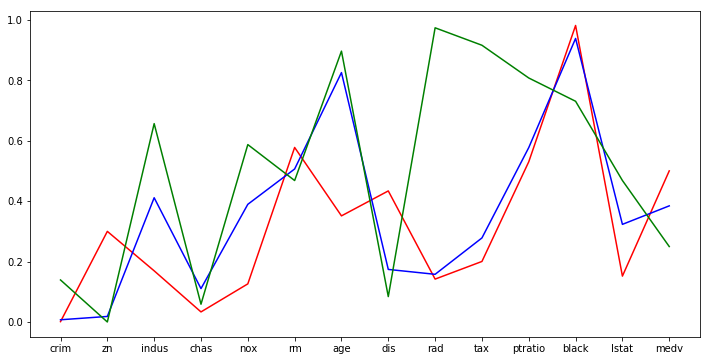

In [10]:
plt.close()
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.plot(centroids[2,:], c = 'g')
plt.rcParams['figure.figsize']=[12,6]
plt.xticks(list(range(14)), att_names)
plt.show()

In [14]:
type(boston)

numpy.ndarray

In [15]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(boston)
    cluste_labels = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

## Elbow method based on Intra Cluster Distance

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

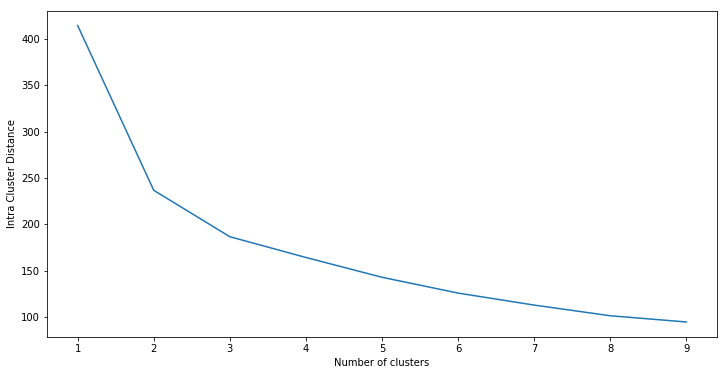

In [18]:
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

## Silhouette score

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(boston, cluster_labels)

0.29723064807178085

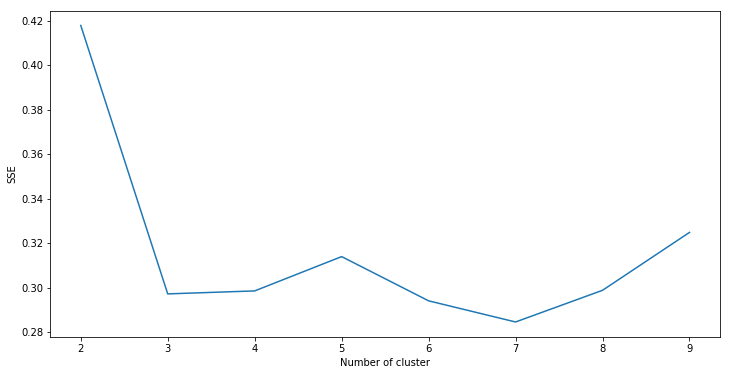

In [21]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(boston)
    cluster_labels = kmeans.fit_predict(boston)
    sse[k] = silhouette_score(boston, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#

In [2]:
import matplotlib as mpl
from yellowbrick.cluster import SilhouetteVisualizer

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/vucko83/anaconda3/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [5]:
#!pip uninstall numpy
import numpy as np

In [233]:
model = kmeans # This is the best model found in 

In [33]:
visualizer = SilhouetteVisualizer(model)
visualizer.fit(model)

# !!! Check yellowbrick documentation and Silhouette index

NameError: name 'SilhouetteVisualizer' is not defined

In [226]:
kmeans_algorithm

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

New examples and assigning to

# Hierarchical Aglommerative clustering 

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/ 

In [34]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [35]:
Z = linkage(boston, 'ward')

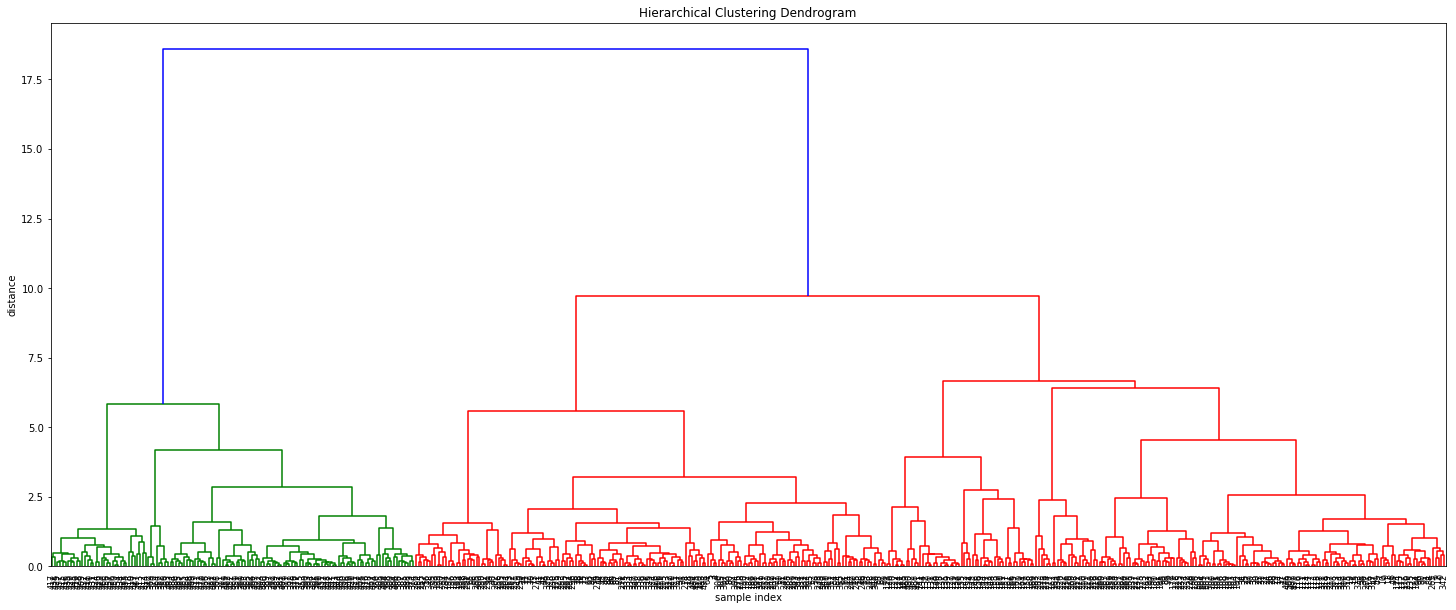

In [36]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [45]:
import seaborn as sns
sns.set(color_codes=True)
#https://seaborn.pydata.org/generated/seaborn.clustermap.html
boston = data('Boston')
g = sns.clustermap(boston, method="single")

/home/vucko83/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  """
/home/vucko83/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  """


In [43]:
boston

array([[  0.00000000e+00,   1.80000000e-01,   6.78152493e-02, ...,
          1.00000000e+00,   8.96799117e-02,   4.22222222e-01],
       [  2.35922539e-04,   0.00000000e+00,   2.42302053e-01, ...,
          1.00000000e+00,   2.04470199e-01,   3.68888889e-01],
       [  2.35697744e-04,   0.00000000e+00,   2.42302053e-01, ...,
          9.89737254e-01,   6.34657837e-02,   6.60000000e-01],
       ..., 
       [  6.11892474e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.07891832e-01,   4.20000000e-01],
       [  1.16072990e-03,   0.00000000e+00,   4.20454545e-01, ...,
          9.91300620e-01,   1.31070640e-01,   3.77777778e-01],
       [  4.61841693e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.69701987e-01,   1.53333333e-01]])

## Cluster number selection and application to new data

- sklearn has a wrapper for scipy clustering, so it can be used similarly to any sklearn method (fit)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(boston)
clustering.labels_

In [ ]:
cluster_normalized_color = [cluster_color_map[i] for i in df_normalized.Cluster]
plt.close()
plt.xlabel('Age')
plt.scatter(df_normalized.Age, df_normalized.Salary, c = cluster_normalized_color, label = df_normalized.Cluster)
plt.scatter(centers_normalized[:,0], centers_normalized[:,1], marker='+', s = 200, c = 'black')
plt.show()